In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic, ccf
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from pandas import Series
from matplotlib import pyplot

In [196]:
df=pd.read_csv("/content/drive/MyDrive/My Grih Laxmi/freshflow-main/freshflow/data.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df["day"]=pd.to_datetime(df["day"])
df.set_index("day",inplace=True)
df.head(3)

,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
day,,,,,,,
2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47


Statistical description of data is: 
        item_number  purchase_price  suggested_retail_price  orders_quantity  \
count  1.878000e+03     1878.000000             1878.000000      1878.000000   
mean   8.014925e+07        1.216796                1.941402         8.602769   
std    1.227237e+05        0.568129                0.936656        14.981958   
min    8.002835e+07        0.520000                0.660000         0.000000   
25%    8.002835e+07        0.674928                1.055314         0.000000   
50%    8.010192e+07        0.978451                1.546338         0.000000   
75%    8.031748e+07        1.991321                3.216415        18.000000   
max    8.031748e+07        2.150000                3.490000       144.000000   

       sales_quantity     revenue  
count     1878.000000  926.000000  
mean         8.235357   21.207775  
std         11.510945   13.069028  
min          0.000000    1.490000  
25%          0.000000   12.847500  
50%          0.000000   19

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


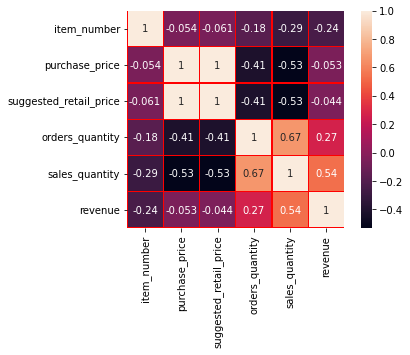

In [197]:
def eda(df):
    print("Statistical description of data is: ")
    print(df.describe())
    print()
    print("Null values are :")
    print(df.isnull().sum())
    print()
    print("Treating null values by filliling it with mean values")
    df.fillna(df.mean(),inplace=True)
    print()
    print("Null values after treatment are : ")
    print(df.isnull().sum())
    print()
    print("correlation between variables is: ")
    sns.heatmap(df.corr(),linewidth=0.2,vmax=1.0,square=True,linecolor='red',annot=True)
eda(df)


In [198]:
num_df=df[['item_number', 'purchase_price', 'suggested_retail_price',
       'orders_quantity', 'sales_quantity', 'revenue']]

Plotting data of numerical columns

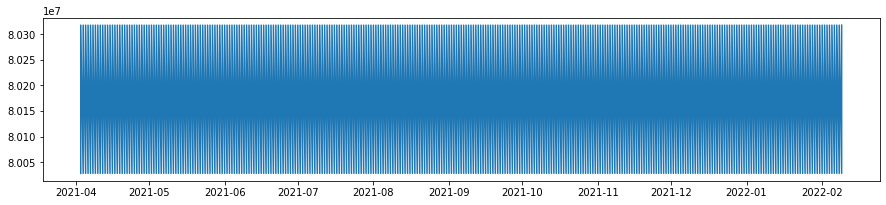

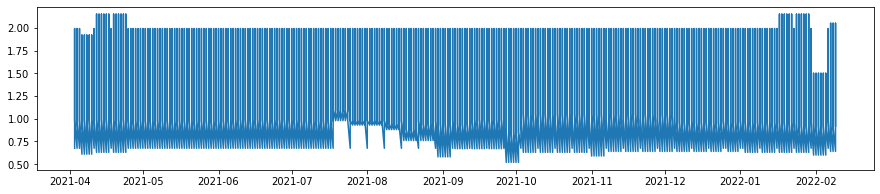

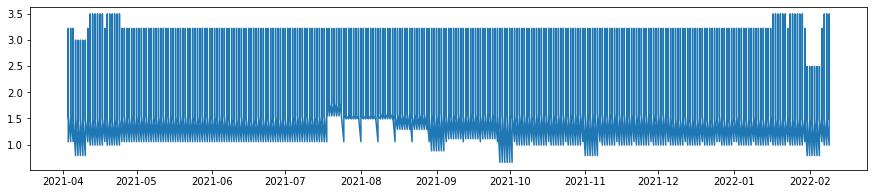

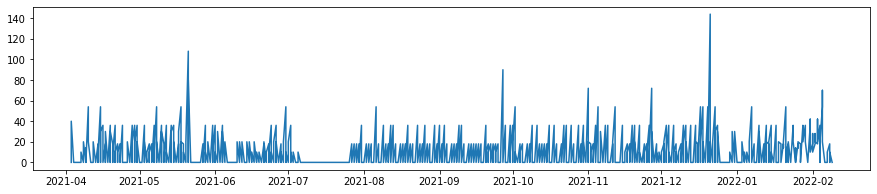

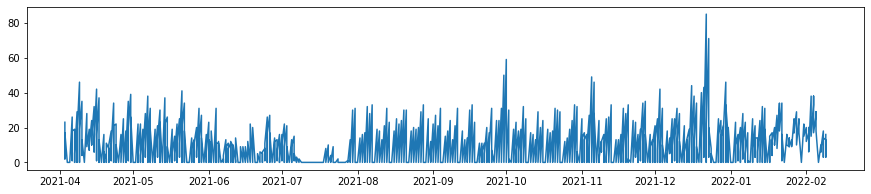

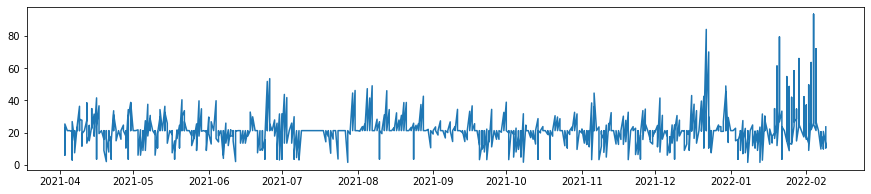

In [199]:
for col in num_df.columns:
    plt.figure(figsize=(15,3))
    plt.plot(num_df[col])
    plt.show()

Distributions plot using kde and histogram

Distribution of various features





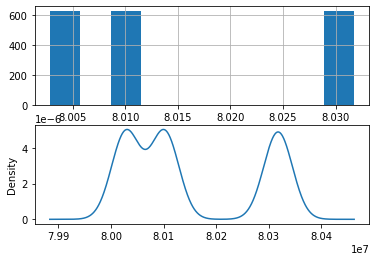

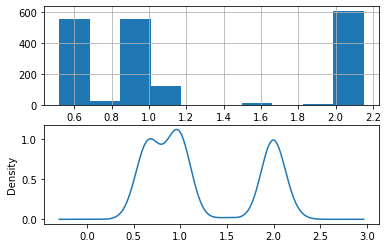

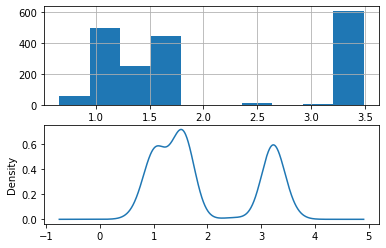

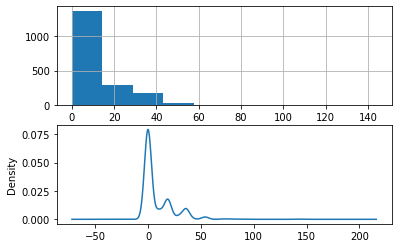

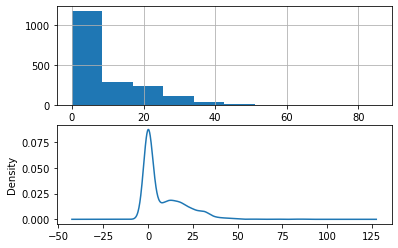

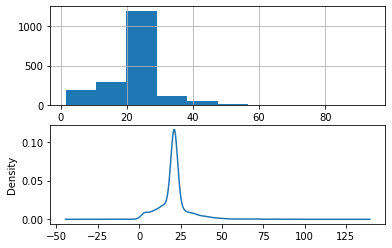

Box plot for outlier detection


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

checking stationarity using acf and pacf plots





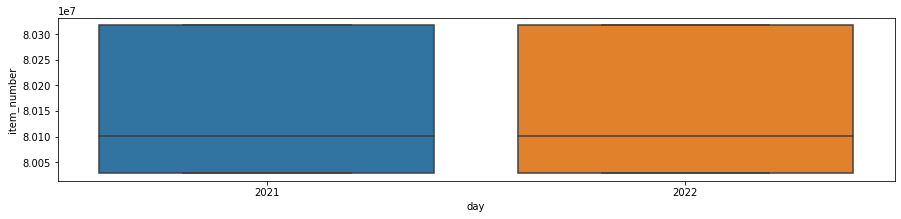

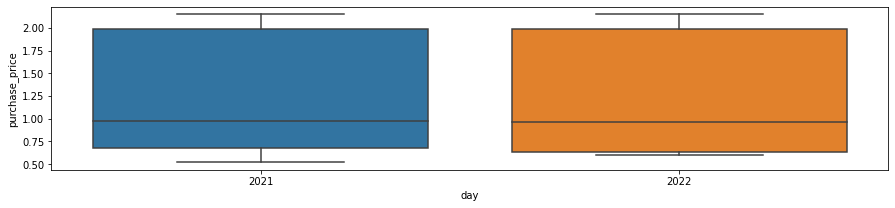

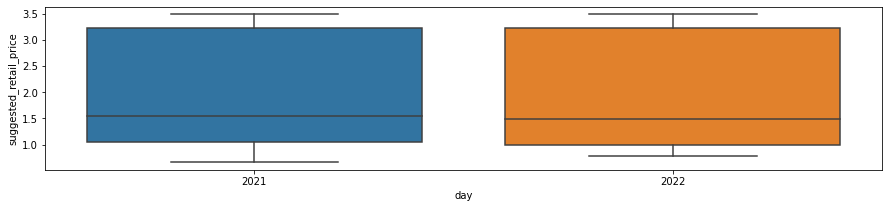

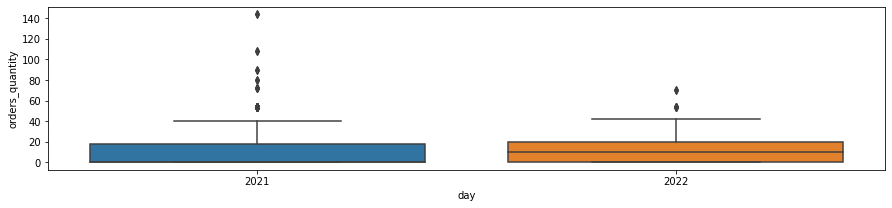

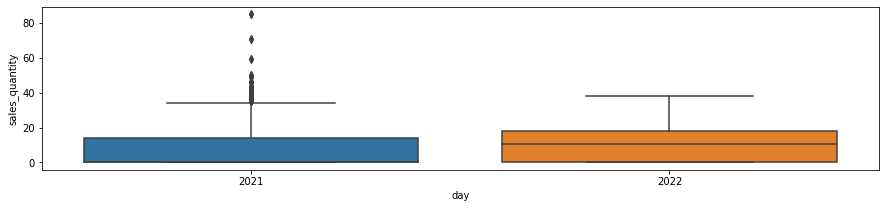

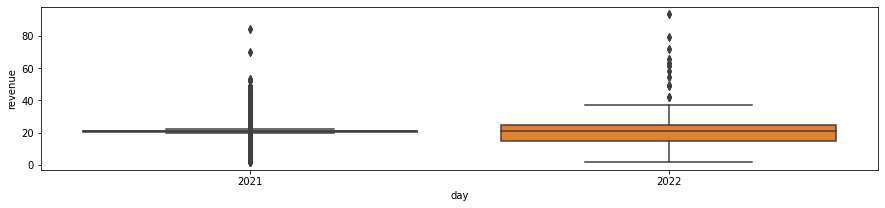

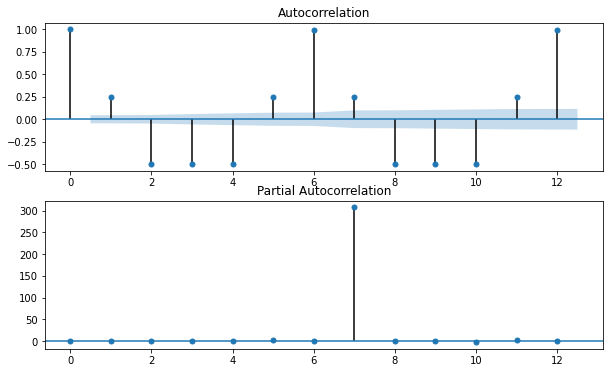

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


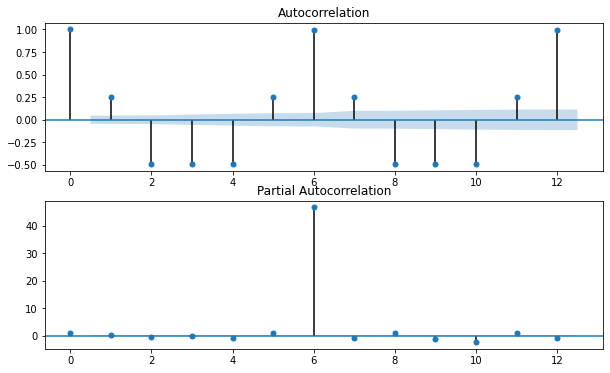

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


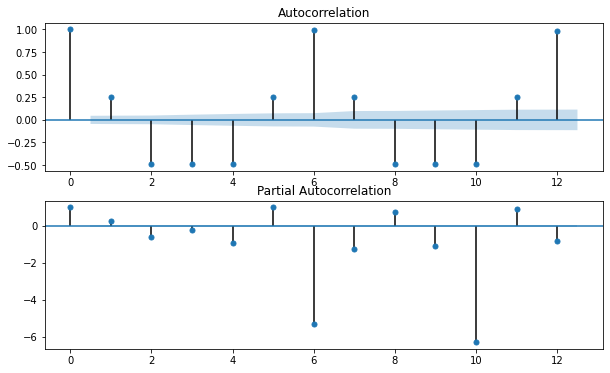

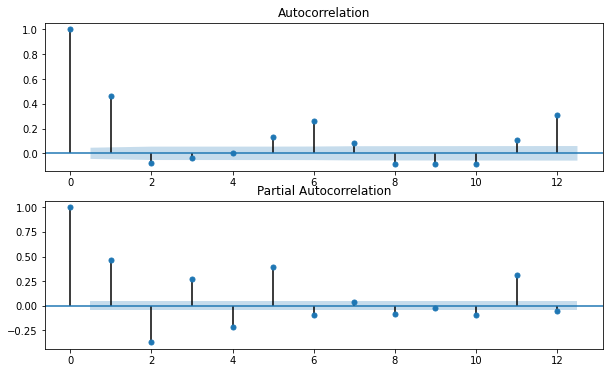

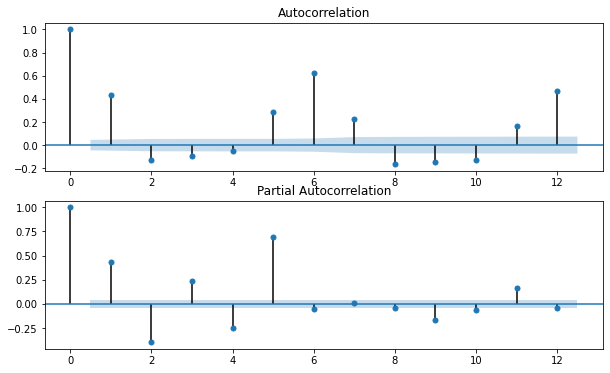

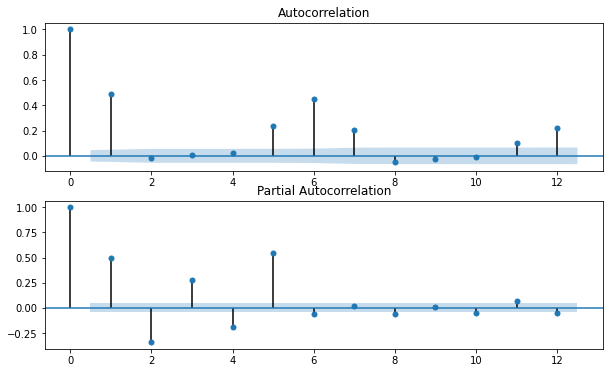

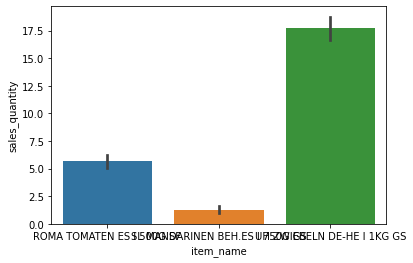

In [200]:
def visualization(num_df):
    def distribution_check(num_df):
        pyplot.figure(1)
        pyplot.subplot(211)
        num_df.hist()
        pyplot.subplot(212)
        print()
        print()
        print()
        num_df.plot(kind='kde')
        pyplot.show()

    # using ACF and PACF plots:
    def stationarity_acf_pacf(num_df):
        pyplot.figure(figsize=(10,6))
        pyplot.subplot(211)
        plot_acf(num_df, ax=pyplot.gca(),lags=12)
        pyplot.subplot(212)
        plot_pacf(num_df, ax=pyplot.gca(),lags=12)
        print()
        print()
        print()
        pyplot.show()

    print("Distribution of various features")
    for col in num_df:
        distribution_check(num_df[col])

    print("Box plot for outlier detection")
    # box whisker plot
    for col in num_df:
        fig, ax = plt.subplots(figsize=(15,3))
        sns.boxplot(num_df[col].index.year, num_df[col], ax=ax)

    print("checking stationarity using acf and pacf plots")
    for col in num_df:
        stationarity_acf_pacf(num_df[col])

    sns.barplot(x = 'item_name',
            y = 'sales_quantity',
            data=df ) 
 
    # Show the plot
    plt.show()

visualization(num_df)

Decomposing using statsmodel:

We can use statsmodels to perform a deccomposition IT deconstructs a time series into several components, each representing one of the underlying categories of patterns. With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

In [201]:
def decomposition(df):
    decomposition = sts.seasonal_decompose(df,model='additive', freq=12)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.subplot(411)
    df.plot(kind="line",figsize=(10,6),label='Original')
    plt.subplot(412)
    trend.plot(kind="line",figsize=(10,6),label='trend')
    plt.legend(loc='best')
    plt.subplot(413)
    seasonal.plot(kind="kde",figsize=(10,6),label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    residual.plot(kind="line",figsize=(10,6),label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()

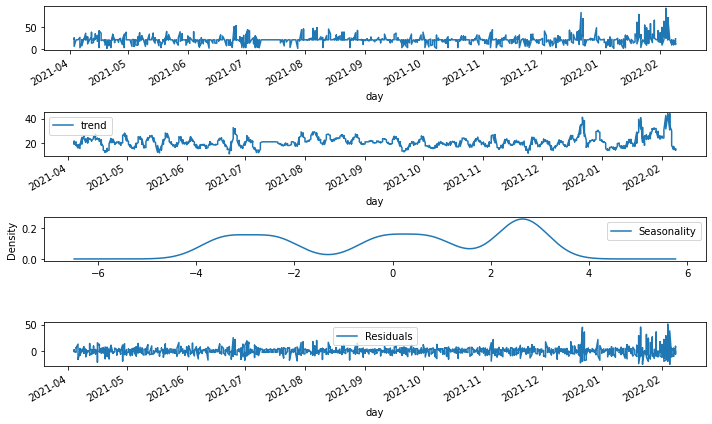

In [202]:
decomposition(num_df["revenue"])

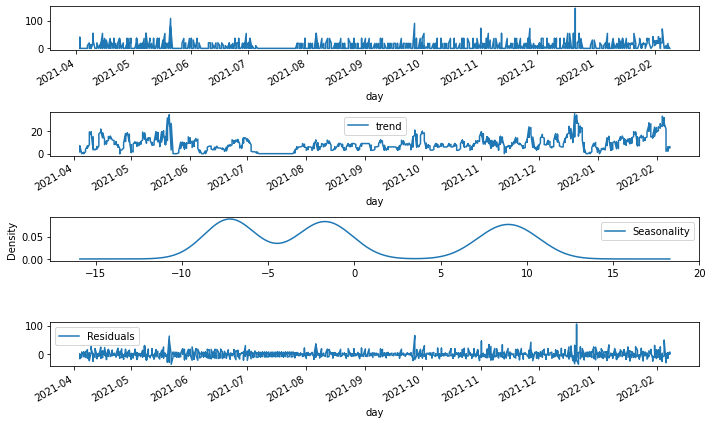

In [203]:
decomposition(num_df["orders_quantity"])

Checking stationarity using dickey fuller test

In [204]:
def test_stationarity(num_df):
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean= pd.core.window.Rolling(num_df, window=12).mean()
    rolstd = pd.core.window.Rolling(num_df, window=12).std()
    #rolmean = timeseries.rolling(12).mean()
    #rolstd  = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(num_df, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(num_df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

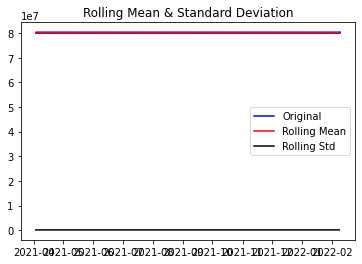

Results of Dickey-Fuller Test:
Test Statistic                  -69.557719
p-value                           0.000000
#Lags Used                       24.000000
Number of Observations Used    1853.000000
Critical Value (1%)              -3.433884
Critical Value (5%)              -2.863101
Critical Value (10%)             -2.567601
dtype: float64


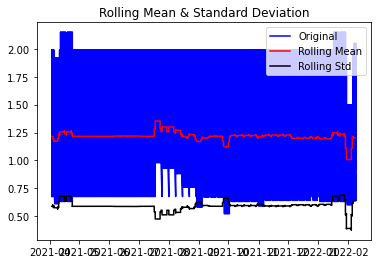

Results of Dickey-Fuller Test:
Test Statistic                   -4.615701
p-value                           0.000121
#Lags Used                       10.000000
Number of Observations Used    1867.000000
Critical Value (1%)              -3.433857
Critical Value (5%)              -2.863089
Critical Value (10%)             -2.567595
dtype: float64


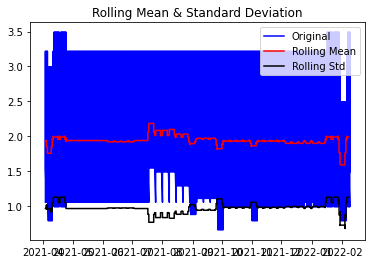

Results of Dickey-Fuller Test:
Test Statistic                   -5.069262
p-value                           0.000016
#Lags Used                       12.000000
Number of Observations Used    1865.000000
Critical Value (1%)              -3.433861
Critical Value (5%)              -2.863091
Critical Value (10%)             -2.567596
dtype: float64


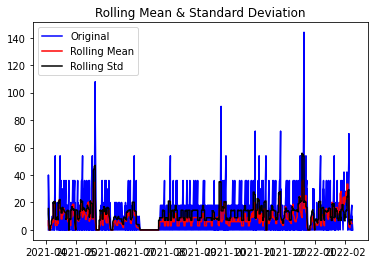

Results of Dickey-Fuller Test:
Test Statistic                   -5.534226
p-value                           0.000002
#Lags Used                       22.000000
Number of Observations Used    1855.000000
Critical Value (1%)              -3.433880
Critical Value (5%)              -2.863099
Critical Value (10%)             -2.567600
dtype: float64


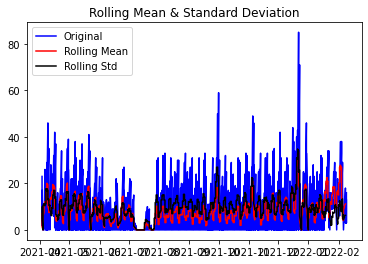

Results of Dickey-Fuller Test:
Test Statistic                -6.612011e+00
p-value                        6.342310e-09
#Lags Used                     2.200000e+01
Number of Observations Used    1.855000e+03
Critical Value (1%)           -3.433880e+00
Critical Value (5%)           -2.863099e+00
Critical Value (10%)          -2.567600e+00
dtype: float64


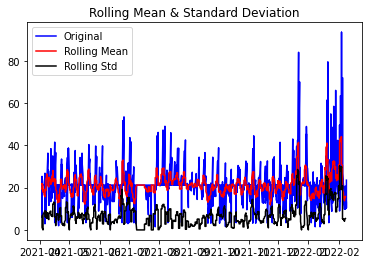

Results of Dickey-Fuller Test:
Test Statistic                -7.541795e+00
p-value                        3.362957e-11
#Lags Used                     2.400000e+01
Number of Observations Used    1.853000e+03
Critical Value (1%)           -3.433884e+00
Critical Value (5%)           -2.863101e+00
Critical Value (10%)          -2.567601e+00
dtype: float64


In [205]:
for col in num_df:
    test_stationarity(num_df[col])

Feature Engineering

In [206]:
import datetime as dt
num_df=num_df.reset_index()
num_df['profit'] = num_df['suggested_retail_price'] - num_df['purchase_price']
num_df['week_day'] = num_df["day"].dt.dayofweek
num_df['month_day'] = num_df['day'].dt.day
num_df['month'] = num_df['day'].dt.month
num_df.set_index("day",inplace=True)
num_df.head(3)

,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,profit,week_day,month_day,month
day,,,,,,,,,,
2022-02-09,80317483,0.92,1.49,0.0,16.0,23.55,0.57,2,9,2
2022-02-09,80317483,0.92,1.49,0.0,16.0,23.55,0.57,2,9,2
2022-02-09,80101923,2.05,3.49,0.0,3.0,10.47,1.44,2,9,2


Train Test

In [207]:
#Training and test set
test_days = 30
training_set = num_df.iloc[:-test_days, :]
test_set = num_df.iloc[-test_days:, :]
# training_set.drop("level_0",axis=1,inplace=True)
# test_set.drop("level_0",axis=1,inplace=True)
test_set.tail(1)

,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,profit,week_day,month_day,month
day,,,,,,,,,,
2021-04-03,80028349,0.674928,1.055314,0.0,23.0,22.77,0.380386,5,3,4


In [208]:
training_set.head()

,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,profit,week_day,month_day,month
day,,,,,,,,,,
2022-02-09,80317483,0.92,1.49,0.0,16.0,23.55,0.57,2,9,2
2022-02-09,80317483,0.92,1.49,0.0,16.0,23.55,0.57,2,9,2
2022-02-09,80101923,2.05,3.49,0.0,3.0,10.47,1.44,2,9,2
2022-02-09,80101923,2.05,3.49,0.0,3.0,10.47,1.44,2,9,2
2022-02-09,80028349,0.64,0.99,0.0,13.0,12.84,0.35,2,9,2


In [209]:
test_set.head(2)

,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,profit,week_day,month_day,month
day,,,,,,,,,,
2021-04-07,80317483,0.99,1.49,10.0,5.0,7.45,0.5,2,7,4
2021-04-07,80317483,0.99,1.49,10.0,5.0,7.45,0.5,2,7,4


In [210]:
training_set.columns

Index(['item_number', 'purchase_price', 'suggested_retail_price',
       'orders_quantity', 'sales_quantity', 'revenue', 'profit', 'week_day',
       'month_day', 'month'],
      dtype='object')

In [212]:
#exogenous variables
train_exog = training_set[['item_number', 'purchase_price', 'suggested_retail_price',
       'orders_quantity', 'revenue', 'profit', 'week_day',
       'month_day', 'month']]

test_exog = test_set[['item_number', 'purchase_price', 'suggested_retail_price',
       'orders_quantity', 'revenue', 'profit', 'week_day',
       'month_day', 'month']]
       
test_exog.head()

,item_number,purchase_price,suggested_retail_price,orders_quantity,revenue,profit,week_day,month_day,month
day,,,,,,,,,
2021-04-07,80317483,0.99,1.49,10.0,7.450000,0.50,2,7,4
2021-04-07,80317483,0.99,1.49,10.0,7.450000,0.50,2,7,4
2021-04-07,80101923,1.92,2.99,0.0,21.207775,1.07,2,7,4
2021-04-07,80101923,1.92,2.99,0.0,21.207775,1.07,2,7,4
2021-04-07,80028349,0.61,0.79,0.0,15.010000,0.18,2,7,4


In [213]:
#Libraries
from pmdarima import auto_arima

In [215]:
#forecasting model
model = auto_arima(y = training_set['sales_quantity'],
                   X = train_exog,
                   m = 7,
                   seasonal = True,
                   stepwise = False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1777: RuntimeWarning: divide by zero encountered in reciprocal
  a coefficient is constrained to be zero (in which case it is zero).
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1777: RuntimeWarning: divide by zero encountered in reciprocal
  a coefficient is constrained to be zero (in which case it is zero).
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1777: RuntimeWarning: divide by zero encountered in reciprocal
  a coefficient is constrained to be zero (in which case it is zero).
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1777: RuntimeWarning: divide by zero encountered in reciprocal
  a coefficient is constrained to be zero (in which case it is zero).


In [216]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1848
Model:             SARIMAX(0, 1, 2)x(2, 0, 0, 7)   Log Likelihood               -5291.494
Date:                           Wed, 23 Mar 2022   AIC                          10612.988
Time:                                   16:28:26   BIC                          10695.808
Sample:                                        0   HQIC                         10643.520
                                          - 1848                                         
Covariance Type:                             opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -0.0074      0.061     -0.121      0.904      -0.128       0.113
item_number            -1.642e-05      1e-06    -16.391      0.000   -1.84e-05   -1.45e-05
purchase_price            21.4146      1.674     12.793      0.000      18.134      24.695
suggested_retail_price    -6.5960      0.258    -25.562      0.000      -7.102      -6.090
orders_quantity            0.2645      0.005     49.601      0.000       0.254       0.275
revenue                    0.5093      0.008     59.958      0.000       0.493       0.526
profit                   -28.0105      1.912    -14.648      0.000     -31.758     -24.263
week_day                  -0.6350      0.069     -9.188      0.000      -0.770      -0.500
month_day                  0.0896      0.019      4.601      0.000       0.051       0.128
month                      0.9377      0.111      8.480      0.000       0.721       1.154
ma.L1                  -3.701e-06      0.955  -3.87e-06      1.000      -1.872       1.872
ma.L2                     -0.8823      0.012    -72.259      0.000      -0.906      -0.858
ar.S.L7                 -7.24e-16      1.930  -3.75e-16      1.000      -3.783       3.783
ar.S.L14                  -0.0647      0.023     -2.850      0.004      -0.109      -0.020
sigma2                    20.1642      0.461     43.698      0.000      19.260      21.069
===================================================================================
Ljung-Box (Q):                      255.92   Jarque-Bera (JB):              4686.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.47
Prob(H) (two-sided):                  0.06   Kurtosis:                        10.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.75e+17. Standard errors may be unstable.
"""

In [217]:
#predictions
predictions_sarimax = pd.Series(model.predict(n_periods= test_days,
                              X = test_exog)).rename("SARIMAX")
predictions_sarimax.index = test_set.index                              
predictions_sarimax

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # If no frequency, try to get an inferred frequency


day
2021-04-07     6.495607
2021-04-07     6.432644
2021-04-07     7.890806
2021-04-07     7.883401
2021-04-07    18.395229
2021-04-07    18.387825
2021-04-06    12.845128
2021-04-06    12.837723
2021-04-06    -0.471185
2021-04-06    -0.478590
2021-04-06    21.508087
2021-04-06    21.500683
2021-04-05     8.672467
2021-04-05     8.665062
2021-04-05     4.946045
2021-04-05     4.942717
2021-04-05    15.901128
2021-04-05    15.894203
2021-04-04     5.178609
2021-04-04     5.171684
2021-04-04     1.093658
2021-04-04     1.086733
2021-04-04    11.933136
2021-04-04    11.926211
2021-04-03    18.374580
2021-04-03    18.367655
2021-04-03    -6.203084
2021-04-03    -6.210009
2021-04-03    13.235920
2021-04-03    13.228730
Name: SARIMAX, dtype: float64

Model Assessment

In [225]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['sales_quantity'], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set['sales_quantity'], predictions_sarimax)), 0))

6.0
7.0


In [227]:
import pickle
# save the model to disk
filename = '/content/drive/MyDrive/My Grih Laxmi/freshflow-main/freshflow/models/AutoArima_model.sav'
pickle.dump(model, open(filename, 'wb'))

# TBAT MODEL

In [230]:
from tbats import TBATS 
model = TBATS(use_trend = True, seasonal_periods = [7,365.5] ).fit(training_set.sales_quantity)

In [231]:
#predictions
predictions = pd.Series(model.forecast(steps = test_days)).rename("TBATS")
predictions.index = test_set.index

predictions

day
2021-04-07    19.244391
2021-04-07    19.893527
2021-04-07    15.729959
2021-04-07    16.096592
2021-04-07    19.196033
2021-04-07    18.377094
2021-04-06    19.655719
2021-04-06    19.715309
2021-04-06    18.637632
2021-04-06    19.213939
2021-04-06    18.923276
2021-04-06    18.922555
2021-04-05    19.425809
2021-04-05    19.249743
2021-04-05    19.415744
2021-04-05    19.534547
2021-04-05    19.425921
2021-04-05    19.591556
2021-04-04    19.627978
2021-04-04    19.658354
2021-04-04    19.790877
2021-04-04    19.814125
2021-04-04    19.884047
2021-04-04    19.965707
2021-04-03    20.002127
2021-04-03    20.081554
2021-04-03    20.144977
2021-04-03    20.200148
2021-04-03    20.275024
2021-04-03    20.333191
Name: TBATS, dtype: float64

In [233]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_set.sales_quantity,
                           predictions))


15.266050347965367

In [ ]:
import pickle

modelname = '/content/drive/MyDrive/Assignent/Freshflow/TBATS.sav'

pickle.dump(model, open(modelname, 'wb'))